In [2]:
import numpy as np
import os
import cv2 as cv
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import tensorflow as tf
from tensorflow.keras.layers import Flatten, Dense, Input, Conv2D, Masking
from tensorflow.keras.layers import SimpleRNN, LSTM, RNN

In [3]:
trainPathCV="D:\Akanksha\IIT Mandi\Sem2\Deep Learning\Assignment 6\CV"
TrCls=os.listdir(trainPathCV)
TrData=[]
TrLabel=[]
TestData=[]
TestLabel=[]
label=-1
for i in TrCls:
    path1=trainPathCV+"\\"+i
    data=os.listdir(path1)
    #label=np.zeros(5)
    label+=1
    for j in data:
        path2=path1+"\\"+j
        samp=os.listdir(path2)
        for m in samp:
            path3=path2+"\\"+m
            d1=[]
            with open(path3) as f:
                data=f.read()
                data=data.splitlines()
            for k in range(len(data)):
                a=data[k].split(" ")
                a=a[:-1]
                for l in range(len(a)):
                    a[l]=float(a[l]) 
                a=np.array(a)
                d1.append(a)
                d=np.array(d1) 
            if j =="Train":
                TrData.append(d)
                TrLabel.append(label)
            if j=="Test":
                TestData.append(d)
                TestLabel.append(label)


In [4]:
sizes=[]
TrDataEmm=[]
for i in range(len(TrData)):
    sizes.append(TrData[i].shape)
maxLen=max(sizes)
for j in TrData:
    a=np.zeros(maxLen)
    for k in range(j.shape[0]):
        for l in range(j.shape[1]):
            a[k][l]+=j[k][l]
    TrDataEmm.append(a)

In [5]:
TestDataEmm=[]
for j in TestData:
    a=np.zeros(maxLen)
    for k in range(j.shape[0]):
        for l in range(j.shape[1]):
            a[k][l]+=j[k][l]
    TestDataEmm.append(a)

In [6]:
TrDataEmm=np.array(TrDataEmm)
TrLabel=np.array(TrLabel)
TestDataEmm=np.array(TestDataEmm)
TestLabel=np.array(TestLabel)

In [115]:
TrDataEmm.shape

(1508, 78, 39)

In [116]:
TrLabel

array([0, 0, 0, ..., 4, 4, 4])

In [94]:
TrDataEmm

array([[[-7.017944e+00,  3.343965e+00,  5.088749e-01, ...,
         -2.498132e-01, -5.239335e-01,  1.023646e-04],
        [-8.541749e+00,  3.370250e+00,  1.637278e+00, ...,
         -6.831710e-01, -1.071238e+00,  3.093555e-03],
        [-8.655733e+00,  3.673251e+00,  2.164013e+00, ...,
         -8.713106e-01, -1.333650e+00,  5.719466e-03],
        ...,
        [ 0.000000e+00,  0.000000e+00,  0.000000e+00, ...,
          0.000000e+00,  0.000000e+00,  0.000000e+00],
        [ 0.000000e+00,  0.000000e+00,  0.000000e+00, ...,
          0.000000e+00,  0.000000e+00,  0.000000e+00],
        [ 0.000000e+00,  0.000000e+00,  0.000000e+00, ...,
          0.000000e+00,  0.000000e+00,  0.000000e+00]],

       [[-6.104867e+00,  6.638686e+00,  3.412268e+00, ...,
         -2.496719e-01,  2.151365e-01, -4.299909e-03],
        [-6.496320e+00,  9.044715e+00,  6.910264e+00, ...,
         -9.633296e-01, -2.224530e-01, -4.861550e-03],
        [-6.687428e+00,  1.037914e+01,  4.214595e+00, ...,
         -1.33

In [100]:
model = tf.keras.models.Sequential()
model.add(Masking(mask_value=0, input_shape=(78, 39)))
model.add(SimpleRNN(units=1))
model.add(Dense(units=5, activation='softmax'))

In [101]:
adam_optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001)
model.compile(loss="sparse_categorical_crossentropy", optimizer = adam_optimizer, metrics=['accuracy'])
earlystopping = tf.keras.callbacks.EarlyStopping(monitor='loss',min_delta=1e-4,patience=5,verbose=1)

In [102]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 masking_3 (Masking)         (None, 78, 39)            0         
                                                                 
 simple_rnn_3 (SimpleRNN)    (None, 1)                 41        
                                                                 
 dense_2 (Dense)             (None, 5)                 10        
                                                                 
Total params: 51
Trainable params: 51
Non-trainable params: 0
_________________________________________________________________


In [117]:
history = model.fit(x=TrDataEmm, y=TrLabel,batch_size=1, epochs=1000,callbacks=[earlystopping],verbose=1, shuffle=True)

Epoch 1/1000
1508/1508 [==============================] - 79s 50ms/step - loss: 1.5210 - accuracy: 0.3561
Epoch 2/1000
1508/1508 [==============================] - 78s 52ms/step - loss: 1.2887 - accuracy: 0.5000
Epoch 3/1000
1508/1508 [==============================] - 68s 45ms/step - loss: 1.1925 - accuracy: 0.5153
Epoch 4/1000
1508/1508 [==============================] - 68s 45ms/step - loss: 1.1513 - accuracy: 0.5179
Epoch 5/1000
1508/1508 [==============================] - 60s 40ms/step - loss: 1.1254 - accuracy: 0.5252
Epoch 6/1000
1508/1508 [==============================] - 59s 39ms/step - loss: 1.1074 - accuracy: 0.5239
Epoch 7/1000
1508/1508 [==============================] - 65s 43ms/step - loss: 1.0934 - accuracy: 0.5252
Epoch 8/1000
1508/1508 [==============================] - 64s 43ms/step - loss: 1.0798 - accuracy: 0.5259
Epoch 9/1000
1508/1508 [==============================] - 64s 42ms/step - loss: 1.0745 - accuracy: 0.5318
Epoch 10/1000
1508/1508 [=====================

Text(0.5, 1.0, 'Loss per epoch')

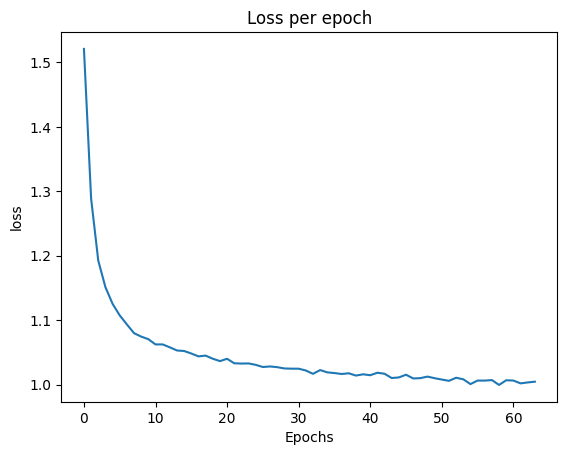

In [118]:
loss=history.history["loss"]
plt.plot(loss)
plt.xlabel("Epochs")
plt.ylabel("loss")
plt.title("Loss per epoch")

In [120]:
model.evaluate(TrDataEmm,TrLabel)

48/48 [==============================] - 1s 21ms/step - loss: 0.9938 - accuracy: 0.5796


[0.9938168525695801, 0.5795755982398987]

In [121]:
model.evaluate(TestDataEmm,TestLabel)

12/12 [==============================] - 0s 18ms/step - loss: 1.0709 - accuracy: 0.5385


[1.070894718170166, 0.5384615659713745]

In [123]:
model1 = tf.keras.models.Sequential()
model1.add(Masking(mask_value=0, input_shape=(78, 39)))
model1.add(SimpleRNN(units=5))
model1.add(Dense(units=5, activation='softmax'))

In [124]:
adam_optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001)
model1.compile(loss="sparse_categorical_crossentropy", optimizer = adam_optimizer, metrics=['accuracy'])
earlystopping = tf.keras.callbacks.EarlyStopping(monitor='loss',min_delta=1e-4,patience=5,verbose=1)

In [125]:
model1.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 masking_4 (Masking)         (None, 78, 39)            0         
                                                                 
 simple_rnn_4 (SimpleRNN)    (None, 5)                 225       
                                                                 
 dense_3 (Dense)             (None, 5)                 30        
                                                                 
Total params: 255
Trainable params: 255
Non-trainable params: 0
_________________________________________________________________


In [126]:
history1 = model1.fit(x=TrDataEmm, y=TrLabel,batch_size=1, epochs=1000,callbacks=[earlystopping],verbose=1, shuffle=True)

Epoch 1/1000
1508/1508 [==============================] - 78s 48ms/step - loss: 1.3670 - accuracy: 0.4595
Epoch 2/1000
1508/1508 [==============================] - 68s 45ms/step - loss: 1.1562 - accuracy: 0.5259
Epoch 3/1000
1508/1508 [==============================] - 71s 47ms/step - loss: 1.0719 - accuracy: 0.5577
Epoch 4/1000
1508/1508 [==============================] - 66s 44ms/step - loss: 1.0245 - accuracy: 0.5743
Epoch 5/1000
1508/1508 [==============================] - 69s 46ms/step - loss: 1.0018 - accuracy: 0.5862
Epoch 6/1000
1508/1508 [==============================] - 65s 43ms/step - loss: 0.9820 - accuracy: 0.5915
Epoch 7/1000
1508/1508 [==============================] - 75s 50ms/step - loss: 0.9662 - accuracy: 0.5935
Epoch 8/1000
1508/1508 [==============================] - 68s 45ms/step - loss: 0.9469 - accuracy: 0.5995
Epoch 9/1000
1508/1508 [==============================] - 51s 34ms/step - loss: 0.9326 - accuracy: 0.6114
Epoch 10/1000
1508/1508 [=====================

Text(0.5, 1.0, 'Loss per epoch')

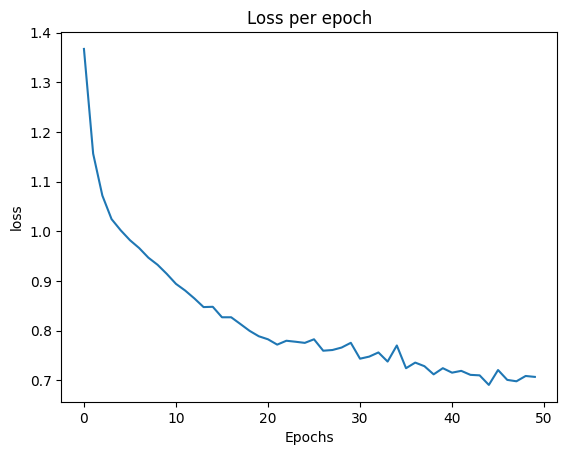

In [127]:
loss1=history1.history["loss"]
plt.plot(loss1)
plt.xlabel("Epochs")
plt.ylabel("loss")
plt.title("Loss per epoch")

In [128]:
model1.evaluate(TrDataEmm,TrLabel)

48/48 [==============================] - 4s 22ms/step - loss: 0.8166 - accuracy: 0.6618


[0.8166260123252869, 0.6618037223815918]

In [129]:
model1.evaluate(TestDataEmm,TestLabel)

12/12 [==============================] - 0s 22ms/step - loss: 0.9515 - accuracy: 0.6207


[0.9514713287353516, 0.6206896305084229]

In [24]:
model2 = tf.keras.models.Sequential()
model2.add(Masking(mask_value=0, input_shape=(78, 39)))
model2.add(SimpleRNN(units=5,return_sequences=True))
model2.add(SimpleRNN(units=5))
model2.add(Dense(units=5, activation='softmax'))

In [25]:
adam_optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001)
model2.compile(loss="sparse_categorical_crossentropy", optimizer = adam_optimizer, metrics=['accuracy'])
earlystopping = tf.keras.callbacks.EarlyStopping(monitor='loss',min_delta=1e-4,patience=5,verbose=1)

In [26]:
model2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 masking_2 (Masking)         (None, 78, 39)            0         
                                                                 
 simple_rnn (SimpleRNN)      (None, 78, 5)             225       
                                                                 
 simple_rnn_1 (SimpleRNN)    (None, 5)                 55        
                                                                 
 dense_2 (Dense)             (None, 5)                 30        
                                                                 
Total params: 310
Trainable params: 310
Non-trainable params: 0
_________________________________________________________________


In [27]:
history2 = model2.fit(x=TrDataEmm, y=TrLabel,batch_size=1, epochs=1000,callbacks=[earlystopping],verbose=1, shuffle=True)

Epoch 1/1000
1508/1508 [==============================] - 154s 96ms/step - loss: 1.5751 - accuracy: 0.2984
Epoch 2/1000
1508/1508 [==============================] - 149s 99ms/step - loss: 1.2279 - accuracy: 0.5179
Epoch 3/1000
1508/1508 [==============================] - 141s 93ms/step - loss: 1.0606 - accuracy: 0.5603
Epoch 4/1000
1508/1508 [==============================] - 117s 78ms/step - loss: 0.9915 - accuracy: 0.5862
Epoch 5/1000
1508/1508 [==============================] - 113s 75ms/step - loss: 0.9595 - accuracy: 0.6015
Epoch 6/1000
1508/1508 [==============================] - 117s 78ms/step - loss: 0.9363 - accuracy: 0.6174
Epoch 7/1000
1508/1508 [==============================] - 116s 77ms/step - loss: 0.9000 - accuracy: 0.6247
Epoch 8/1000
1508/1508 [==============================] - 105s 70ms/step - loss: 0.8653 - accuracy: 0.6306
Epoch 9/1000
1508/1508 [==============================] - 106s 70ms/step - loss: 0.8421 - accuracy: 0.6300
Epoch 10/1000
1508/1508 [============

Text(0.5, 1.0, 'error vs epoch')

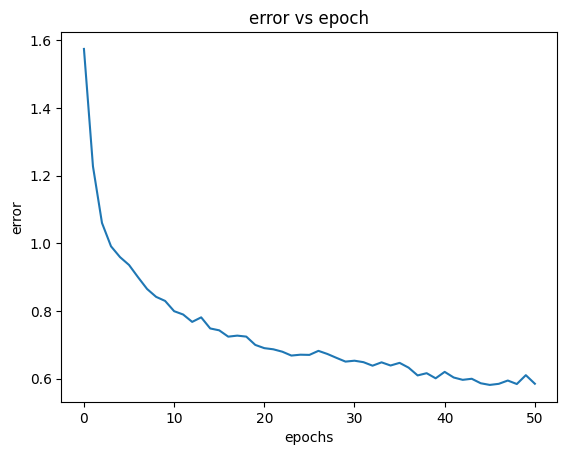

In [28]:
loss2=history2.history["loss"]
plt.plot(loss2)
plt.xlabel("epochs")
plt.ylabel("error")
plt.title("error vs epoch")

In [29]:
model2.evaluate(TrDataEmm,TrLabel)

48/48 [==============================] - 4s 35ms/step - loss: 0.5557 - accuracy: 0.7719


[0.5557175278663635, 0.7718833088874817]

In [30]:
model2.evaluate(TestDataEmm,TestLabel)

12/12 [==============================] - 1s 45ms/step - loss: 0.6997 - accuracy: 0.7374


[0.6996667385101318, 0.7374005317687988]

In [31]:
Pred1=model2.predict(x=TrDataEmm)
Pred1 = tf.argmax(Pred1, axis=1)
TrConf1=tf.math.confusion_matrix(labels=TrLabel,predictions=Pred1)
TrConf1

48/48 [==============================] - 3s 33ms/step


<tf.Tensor: shape=(5, 5), dtype=int32, numpy=
array([[248,   4,  11,   1,  26],
       [  5, 162,   3,   0,  27],
       [  0,   2, 500,   0,   0],
       [182,   1,  11,   3,  15],
       [ 18,  37,   1,   0, 251]])>

In [33]:
Pred1=model2.predict(x=TestDataEmm)
Pred1 = tf.argmax(Pred1, axis=1)
TestConf1=tf.math.confusion_matrix(labels=TestLabel,predictions=Pred1)
TestConf1

12/12 [==============================] - 0s 32ms/step


<tf.Tensor: shape=(5, 5), dtype=int32, numpy=
array([[ 63,   0,   5,   0,   4],
       [  0,  38,   1,   0,  10],
       [  5,   0, 120,   0,   1],
       [ 43,   1,   4,   0,   5],
       [ 11,   8,   1,   0,  57]])>

In [153]:
model3 = tf.keras.models.Sequential()
model3.add(Masking(mask_value=0, input_shape=(78, 39)))
model3.add(LSTM(units=5))#,return_sequences=True))
#model3.add(SimpleRNN(units=5))
model3.add(Dense(units=5, activation='softmax'))

In [154]:
adam_optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001)
model3.compile(loss="sparse_categorical_crossentropy", optimizer = adam_optimizer, metrics=['accuracy'])
earlystopping = tf.keras.callbacks.EarlyStopping(monitor='loss',min_delta=1e-4,patience=5,verbose=1)

In [155]:
model3.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 masking_11 (Masking)        (None, 78, 39)            0         
                                                                 
 lstm (LSTM)                 (None, 5)                 900       
                                                                 
 dense_6 (Dense)             (None, 5)                 30        
                                                                 
Total params: 930
Trainable params: 930
Non-trainable params: 0
_________________________________________________________________


In [156]:
history3 = model3.fit(x=TrDataEmm, y=TrLabel,batch_size=1, epochs=1000,callbacks=[earlystopping],verbose=1, shuffle=True)

Epoch 1/1000
1508/1508 [==============================] - 114s 66ms/step - loss: 1.4581 - accuracy: 0.4271
Epoch 2/1000
1508/1508 [==============================] - 97s 64ms/step - loss: 1.0418 - accuracy: 0.5908
Epoch 3/1000
1508/1508 [==============================] - 91s 60ms/step - loss: 0.8110 - accuracy: 0.6923
Epoch 4/1000
1508/1508 [==============================] - 96s 64ms/step - loss: 0.7088 - accuracy: 0.7241
Epoch 5/1000
1508/1508 [==============================] - 92s 61ms/step - loss: 0.6520 - accuracy: 0.7387
Epoch 6/1000
1508/1508 [==============================] - 92s 61ms/step - loss: 0.6147 - accuracy: 0.7467
Epoch 7/1000
1508/1508 [==============================] - 91s 60ms/step - loss: 0.5839 - accuracy: 0.7653
Epoch 8/1000
1508/1508 [==============================] - 98s 65ms/step - loss: 0.5480 - accuracy: 0.7745
Epoch 9/1000
1508/1508 [==============================] - 76s 50ms/step - loss: 0.5372 - accuracy: 0.7812
Epoch 10/1000
1508/1508 [====================

Text(0.5, 1.0, 'error vs epoch')

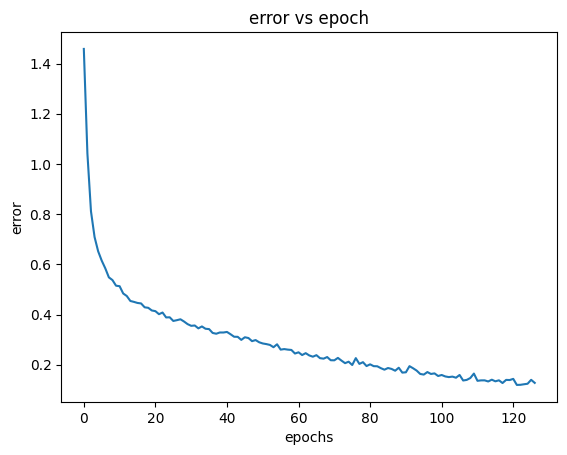

In [157]:
loss3=history3.history["loss"]
plt.plot(loss3)
plt.xlabel("epochs")
plt.ylabel("error")
plt.title("error vs epoch")

In [158]:
model3.evaluate(TrDataEmm,TrLabel)

48/48 [==============================] - 14s 39ms/step - loss: 0.1165 - accuracy: 0.9655


[0.11648663878440857, 0.9655172228813171]

In [159]:
model3.evaluate(TestDataEmm,TestLabel)

12/12 [==============================] - 1s 28ms/step - loss: 0.8748 - accuracy: 0.7931


[0.8747566938400269, 0.7931034564971924]

In [7]:
model4 = tf.keras.models.Sequential()
model4.add(Masking(mask_value=0, input_shape=(78, 39)))
model4.add(LSTM(units=1))#,return_sequences=True))
#model4.add(SimpleRNN(units=5))
model4.add(Dense(units=5, activation='softmax'))

In [8]:
adam_optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001)
model4.compile(loss="sparse_categorical_crossentropy", optimizer = adam_optimizer, metrics=['accuracy'])
earlystopping = tf.keras.callbacks.EarlyStopping(monitor='loss',min_delta=1e-4,patience=5,verbose=1)

In [9]:
model4.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 masking (Masking)           (None, 78, 39)            0         
                                                                 
 lstm (LSTM)                 (None, 1)                 164       
                                                                 
 dense (Dense)               (None, 5)                 10        
                                                                 
Total params: 174
Trainable params: 174
Non-trainable params: 0
_________________________________________________________________


In [10]:
history4 = model4.fit(x=TrDataEmm, y=TrLabel,batch_size=1, epochs=1000,callbacks=[earlystopping],verbose=1, shuffle=True)

Epoch 1/1000
1508/1508 [==============================] - 120s 70ms/step - loss: 1.5201 - accuracy: 0.3700
Epoch 2/1000
1508/1508 [==============================] - 85s 57ms/step - loss: 1.4029 - accuracy: 0.3999
Epoch 3/1000
1508/1508 [==============================] - 77s 51ms/step - loss: 1.3043 - accuracy: 0.4403
Epoch 4/1000
1508/1508 [==============================] - 85s 57ms/step - loss: 1.2147 - accuracy: 0.5027
Epoch 5/1000
1508/1508 [==============================] - 72s 47ms/step - loss: 1.1638 - accuracy: 0.5192
Epoch 6/1000
1508/1508 [==============================] - 70s 47ms/step - loss: 1.1267 - accuracy: 0.5351
Epoch 7/1000
1508/1508 [==============================] - 70s 47ms/step - loss: 1.0876 - accuracy: 0.5557
Epoch 8/1000
1508/1508 [==============================] - 69s 46ms/step - loss: 1.0597 - accuracy: 0.5723
Epoch 9/1000
1508/1508 [==============================] - 70s 47ms/step - loss: 1.0213 - accuracy: 0.5988
Epoch 10/1000
1508/1508 [====================

Text(0.5, 1.0, 'error vs epoch')

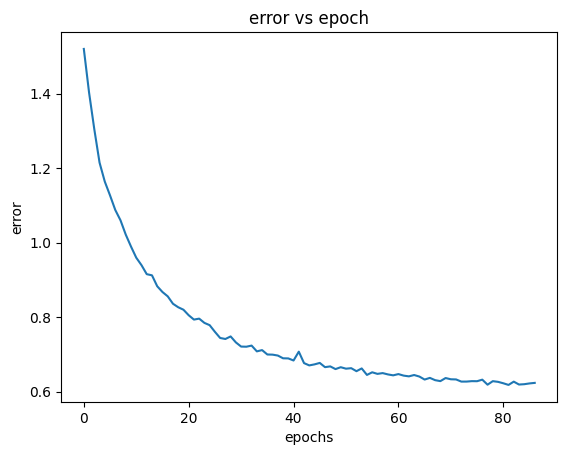

In [11]:
loss4=history4.history["loss"]
plt.plot(loss4)
plt.xlabel("epochs")
plt.ylabel("error")
plt.title("error vs epoch")

In [12]:
model4.evaluate(TrDataEmm,TrLabel)

48/48 [==============================] - 9s 29ms/step - loss: 0.6353 - accuracy: 0.6916


[0.635263979434967, 0.691644549369812]

In [13]:
model4.evaluate(TestDataEmm,TestLabel)

12/12 [==============================] - 0s 25ms/step - loss: 0.8148 - accuracy: 0.6446


[0.8147943019866943, 0.6445623636245728]

In [14]:
model5 = tf.keras.models.Sequential()
model5.add(Masking(mask_value=0, input_shape=(78, 39)))
model5.add(LSTM(units=5,return_sequences=True))
model5.add(LSTM(units=5))
model5.add(Dense(units=5, activation='softmax'))

In [15]:
adam_optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001)
model5.compile(loss="sparse_categorical_crossentropy", optimizer = adam_optimizer, metrics=['accuracy'])
earlystopping = tf.keras.callbacks.EarlyStopping(monitor='loss',min_delta=1e-4,patience=5,verbose=1)

In [16]:
model5.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 masking_1 (Masking)         (None, 78, 39)            0         
                                                                 
 lstm_1 (LSTM)               (None, 78, 5)             900       
                                                                 
 lstm_2 (LSTM)               (None, 5)                 220       
                                                                 
 dense_1 (Dense)             (None, 5)                 30        
                                                                 
Total params: 1,150
Trainable params: 1,150
Non-trainable params: 0
_________________________________________________________________


In [17]:
history5 = model5.fit(x=TrDataEmm, y=TrLabel,batch_size=1, epochs=1000,callbacks=[earlystopping],verbose=1, shuffle=True)

Epoch 1/1000
1508/1508 [==============================] - 184s 106ms/step - loss: 1.2592 - accuracy: 0.5033
Epoch 2/1000
1508/1508 [==============================] - 166s 110ms/step - loss: 0.8171 - accuracy: 0.6718
Epoch 3/1000
1508/1508 [==============================] - 183s 122ms/step - loss: 0.7175 - accuracy: 0.7135
Epoch 4/1000
1508/1508 [==============================] - 181s 120ms/step - loss: 0.6495 - accuracy: 0.7500
Epoch 5/1000
1508/1508 [==============================] - 168s 112ms/step - loss: 0.5911 - accuracy: 0.7745
Epoch 6/1000
1508/1508 [==============================] - 158s 105ms/step - loss: 0.5573 - accuracy: 0.7851
Epoch 7/1000
1508/1508 [==============================] - 161s 107ms/step - loss: 0.5130 - accuracy: 0.8090
Epoch 8/1000
1508/1508 [==============================] - 174s 116ms/step - loss: 0.5025 - accuracy: 0.8130
Epoch 9/1000
1508/1508 [==============================] - 165s 109ms/step - loss: 0.4959 - accuracy: 0.8137
Epoch 10/1000
1508/1508 [===

Text(0.5, 1.0, 'error vs epoch')

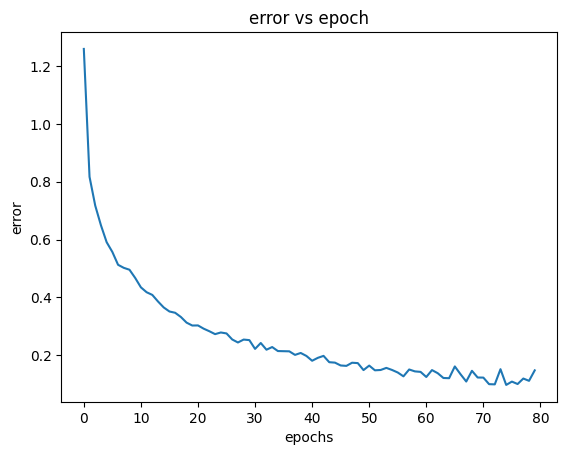

In [18]:
loss5=history5.history["loss"]
plt.plot(loss5)
plt.xlabel("epochs")
plt.ylabel("error")
plt.title("error vs epoch")

In [19]:
model5.evaluate(TrDataEmm,TrLabel)

48/48 [==============================] - 16s 59ms/step - loss: 0.1646 - accuracy: 0.9503


[0.16461189091205597, 0.9502652287483215]

In [20]:
model5.evaluate(TestDataEmm,TestLabel)

12/12 [==============================] - 1s 48ms/step - loss: 0.8224 - accuracy: 0.8117


[0.8223778009414673, 0.8116710782051086]

In [21]:
Pred1=model5.predict(x=TrDataEmm)
Pred1 = tf.argmax(Pred1, axis=1)
TrConf1=tf.math.confusion_matrix(labels=TrLabel,predictions=Pred1)
TrConf1

48/48 [==============================] - 25s 47ms/step


<tf.Tensor: shape=(5, 5), dtype=int32, numpy=
array([[261,   2,   1,  22,   4],
       [  3, 173,   1,   2,  18],
       [  2,   1, 499,   0,   0],
       [  7,   0,   2, 196,   7],
       [  1,   1,   0,   1, 304]])>

In [22]:
Pred1=model5.predict(x=TestDataEmm)
Pred1 = tf.argmax(Pred1, axis=1)
TestConf1=tf.math.confusion_matrix(labels=TestLabel,predictions=Pred1)
TestConf1

12/12 [==============================] - 1s 56ms/step


<tf.Tensor: shape=(5, 5), dtype=int32, numpy=
array([[ 50,   0,   3,  15,   4],
       [  2,  38,   3,   0,   6],
       [  1,   0, 123,   2,   0],
       [ 13,   0,   1,  33,   6],
       [  4,   1,   2,   8,  62]])>